In [8]:
### Generate ROC analysis and visualization in Google Colab with Python
# Import df_m24 data, generated in R, from my drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import pandas as pd
df = pd.read_csv("drive/MyDrive/df_m24.csv")

Mounted at /content/drive


        Variable       AUC    CI Low   CI High       p-value
0            PHS  0.747528  0.678797  0.805560  8.405832e-11
1      GAP.43.bl  0.688622  0.618944  0.753097  7.508251e-07
2  PLASMA_NFL.bl  0.693631  0.628115  0.757971  3.790028e-07
3       ABETA.bl  0.809947  0.756339  0.861615  2.429461e-16
4         TAU.bl  0.796611  0.737180  0.853312  7.202799e-15
5        PTAU.bl  0.815346  0.755638  0.870970  1.312887e-16


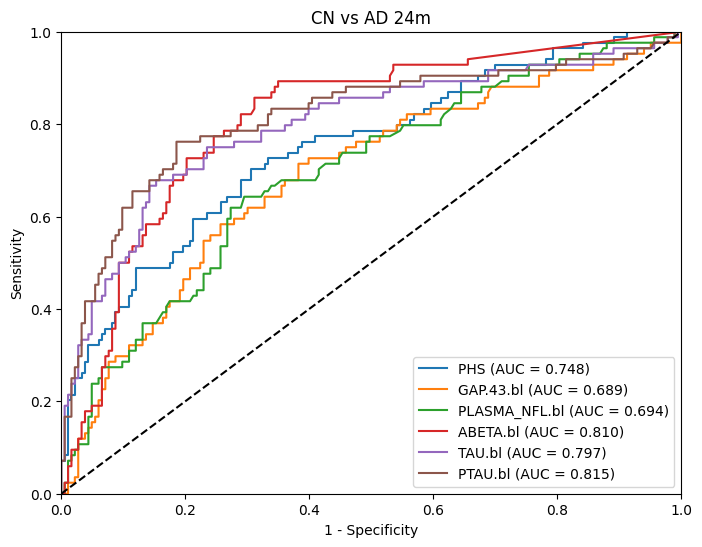

In [9]:
## CN vs AD ROC test with m24 data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import numpy as np

df_filtered = df[df['DX'].isin(['CN', 'AD'])]

results = []

variables = ['PHS', 'GAP.43.bl', 'PLASMA_NFL.bl', 'ABETA.bl', 'TAU.bl', 'PTAU.bl']

for variable in variables:
    cn_values = df_filtered[df_filtered['DX'] == 'CN'][variable]
    ad_values = df_filtered[df_filtered['DX'] == 'AD'][variable]

    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], -df_filtered[variable], pos_label='AD')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], df_filtered[variable], pos_label='AD')
    
    auc = metrics.auc(fpr, tpr)

    # Perform bootstrapping
    np.random.seed(0)
    n_iterations = 1000
    auc_bootstrapped = []
    for _ in range(n_iterations):
        cn_samples = np.random.choice(cn_values, size=len(cn_values), replace=True)
        ad_samples = np.random.choice(ad_values, size=len(ad_values), replace=True)
        if variable == 'ABETA.bl':
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['CN'] * len(cn_samples), ['AD'] * len(ad_samples))),
                -np.concatenate((cn_samples, ad_samples)),
                pos_label='AD'
            )
        else:
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['CN'] * len(cn_samples), ['AD'] * len(ad_samples))),
                np.concatenate((cn_samples, ad_samples)),
                pos_label='AD'
            )
        auc_bootstrapped.append(metrics.auc(fpr, tpr))
    
    auc_bootstrapped = np.array(auc_bootstrapped)
    ci_low, ci_high = np.percentile(auc_bootstrapped, [2.5, 97.5])
    
    _, p_value = stats.mannwhitneyu(cn_values, ad_values, alternative='two-sided')
    
    results.append([variable, auc, ci_low, ci_high, p_value])

results_df = pd.DataFrame(results, columns=['Variable', 'AUC', 'CI Low', 'CI High', 'p-value'])
print(results_df)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for variable in variables:
    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], -df_filtered[variable], pos_label='AD')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], df_filtered[variable], pos_label='AD')
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{variable} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('CN vs AD 24m')
plt.legend()
plt.grid(False)
plt.savefig('ROC_CN_AD_m24.pdf', format='pdf')
plt.show()

# Save the table 
results_df.to_csv('/content/ROC_CN_AD_m24.tsv', sep='\t', index=False)


        Variable       AUC    CI Low   CI High   p-value
0            PHS  0.585151  0.530348  0.639693  0.002637
1      GAP.43.bl  0.476381  0.421305  0.533410  0.404378
2  PLASMA_NFL.bl  0.532753  0.479173  0.589726  0.247499
3       ABETA.bl  0.620117  0.566996  0.676894  0.000019
4         TAU.bl  0.533408  0.477659  0.587084  0.238174
5        PTAU.bl  0.539798  0.483535  0.591611  0.159942


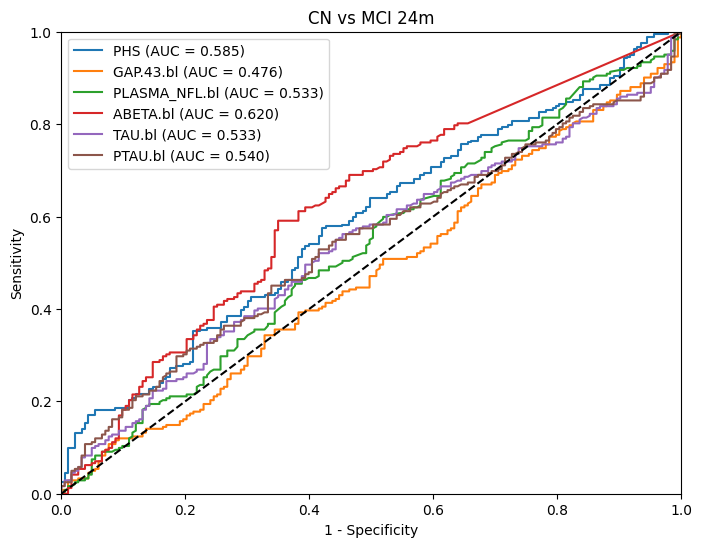

In [10]:
## CN vs MCI ROC test with m24 data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import numpy as np

df_filtered = df[df['DX'].isin(['CN', 'MCI'])]

results = []

variables = ['PHS', 'GAP.43.bl', 'PLASMA_NFL.bl', 'ABETA.bl', 'TAU.bl', 'PTAU.bl']

for variable in variables:
    cn_values = df_filtered[df_filtered['DX'] == 'CN'][variable]
    ad_values = df_filtered[df_filtered['DX'] == 'MCI'][variable]

    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], -df_filtered[variable], pos_label='MCI')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], df_filtered[variable], pos_label='MCI')
    
    auc = metrics.auc(fpr, tpr)

    # Perform bootstrapping
    np.random.seed(0)
    n_iterations = 1000
    auc_bootstrapped = []
    for _ in range(n_iterations):
        cn_samples = np.random.choice(cn_values, size=len(cn_values), replace=True)
        ad_samples = np.random.choice(ad_values, size=len(ad_values), replace=True)
        if variable == 'ABETA.bl':
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['CN'] * len(cn_samples), ['MCI'] * len(ad_samples))),
                -np.concatenate((cn_samples, ad_samples)),
                pos_label='MCI'
            )
        else:
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['CN'] * len(cn_samples), ['MCI'] * len(ad_samples))),
                np.concatenate((cn_samples, ad_samples)),
                pos_label='MCI'
            )
        auc_bootstrapped.append(metrics.auc(fpr, tpr))
    
    auc_bootstrapped = np.array(auc_bootstrapped)
    ci_low, ci_high = np.percentile(auc_bootstrapped, [2.5, 97.5])
    
    _, p_value = stats.mannwhitneyu(cn_values, ad_values, alternative='two-sided')
    
    results.append([variable, auc, ci_low, ci_high, p_value])

results_df = pd.DataFrame(results, columns=['Variable', 'AUC', 'CI Low', 'CI High', 'p-value'])
print(results_df)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for variable in variables:
    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], -df_filtered[variable], pos_label='MCI')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], df_filtered[variable], pos_label='MCI')
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{variable} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('CN vs MCI 24m')
plt.legend()
plt.grid(False)
plt.savefig('ROC_CN_MCI_m24.pdf', format='pdf')
plt.show()

# Save the table 
results_df.to_csv('/content/ROC_CN_MCI_m24.tsv', sep='\t', index=False)


        Variable       AUC    CI Low   CI High       p-value
0            PHS  0.662338  0.598026  0.725514  9.284366e-06
1      GAP.43.bl  0.702283  0.633648  0.767029  3.309807e-08
2  PLASMA_NFL.bl  0.668241  0.602264  0.735101  4.338159e-06
3       ABETA.bl  0.732512  0.664495  0.791472  1.971692e-10
4         TAU.bl  0.760921  0.697583  0.817438  1.034925e-12
5        PTAU.bl  0.770883  0.708010  0.827976  1.383945e-13


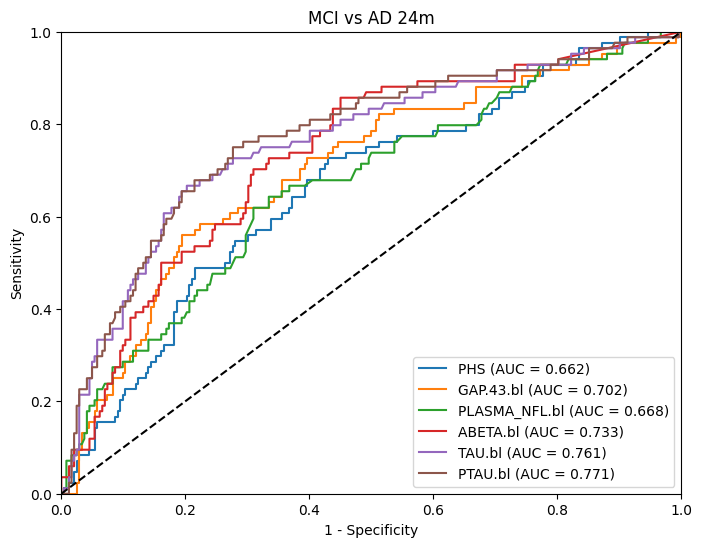

In [11]:
## MCI vs AD ROC test with m24 data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import numpy as np

df_filtered = df[df['DX'].isin(['MCI', 'AD'])]

results = []

variables = ['PHS', 'GAP.43.bl', 'PLASMA_NFL.bl', 'ABETA.bl', 'TAU.bl', 'PTAU.bl']

for variable in variables:
    cn_values = df_filtered[df_filtered['DX'] == 'MCI'][variable]
    ad_values = df_filtered[df_filtered['DX'] == 'AD'][variable]

    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], -df_filtered[variable], pos_label='AD')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], df_filtered[variable], pos_label='AD')
    
    auc = metrics.auc(fpr, tpr)

    # Perform bootstrapping
    np.random.seed(0)
    n_iterations = 1000
    auc_bootstrapped = []
    for _ in range(n_iterations):
        cn_samples = np.random.choice(cn_values, size=len(cn_values), replace=True)
        ad_samples = np.random.choice(ad_values, size=len(ad_values), replace=True)
        if variable == 'ABETA.bl':
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['MCI'] * len(cn_samples), ['AD'] * len(ad_samples))),
                -np.concatenate((cn_samples, ad_samples)),
                pos_label='AD'
            )
        else:
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['MCI'] * len(cn_samples), ['AD'] * len(ad_samples))),
                np.concatenate((cn_samples, ad_samples)),
                pos_label='AD'
            )
        auc_bootstrapped.append(metrics.auc(fpr, tpr))
    
    auc_bootstrapped = np.array(auc_bootstrapped)
    ci_low, ci_high = np.percentile(auc_bootstrapped, [2.5, 97.5])
    
    _, p_value = stats.mannwhitneyu(cn_values, ad_values, alternative='two-sided')
    
    results.append([variable, auc, ci_low, ci_high, p_value])

results_df = pd.DataFrame(results, columns=['Variable', 'AUC', 'CI Low', 'CI High', 'p-value'])
print(results_df)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for variable in variables:
    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], -df_filtered[variable], pos_label='AD')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], df_filtered[variable], pos_label='AD')
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{variable} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('MCI vs AD 24m')
plt.legend()
plt.grid(False)
plt.savefig('ROC_MCI_AD_m24.pdf', format='pdf')
plt.show()

# Save the table 
results_df.to_csv('/content/ROC_MCI_AD_m24.tsv', sep='\t', index=False)


['AD&MCI' 'CN' nan]
        Variable       AUC    CI Low   CI High       p-value
0            PHS  0.626991  0.579827  0.676227  1.959660e-06
1      GAP.43.bl  0.531069  0.478993  0.579279  2.445395e-01
2  PLASMA_NFL.bl  0.574206  0.520383  0.626252  5.436907e-03
3       ABETA.bl  0.669030  0.621429  0.719531  1.885119e-10
4         TAU.bl  0.601227  0.552280  0.649175  1.492697e-04
5        PTAU.bl  0.610798  0.561782  0.658288  3.311996e-05


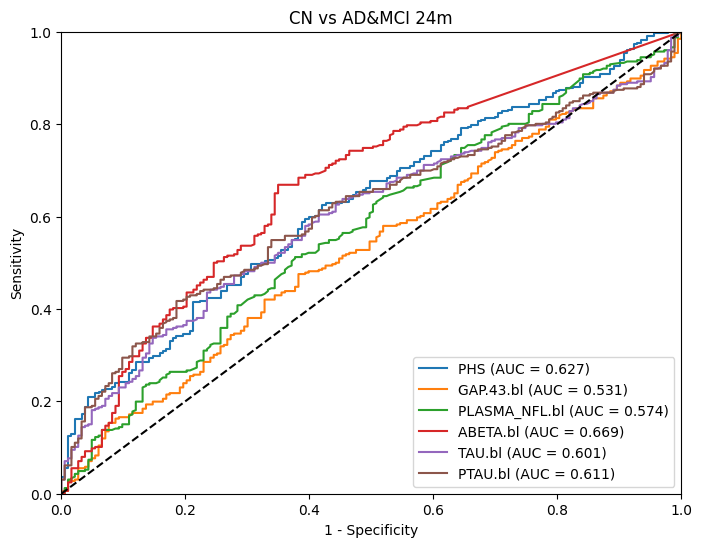

In [13]:
## CN vs AD&MCI ROC test with m24 data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import numpy as np

df_C_AM = df[['AGE', 'PTEDUCAT', 'MMSE', 'ABETA.bl', 'TAU.bl', 'PTAU.bl', 'PHS', 'GAP.43.bl', 'PLASMA_NFL.bl', 'PTGENDER', 'APOE4', 'DX']].copy()
df_C_AM['DX'] = df_C_AM['DX'].replace(['MCI', 'AD'], 'AD&MCI')
unique_values = df_C_AM['DX'].unique()
print(unique_values)

df_C_AM_filtered = df_C_AM[df_C_AM['DX'].isin(['CN', 'AD&MCI'])]

results = []

variables = ['PHS', 'GAP.43.bl', 'PLASMA_NFL.bl', 'ABETA.bl', 'TAU.bl', 'PTAU.bl']

for variable in variables:
    cn_values = df_C_AM_filtered[df_C_AM_filtered['DX'] == 'CN'][variable]
    ad_values = df_C_AM_filtered[df_C_AM_filtered['DX'] == 'AD&MCI'][variable]

    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_C_AM_filtered['DX'], -df_C_AM_filtered[variable], pos_label='AD&MCI')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_C_AM_filtered['DX'], df_C_AM_filtered[variable], pos_label='AD&MCI')
    
    auc = metrics.auc(fpr, tpr)

    # Perform bootstrapping
    np.random.seed(0)
    n_iterations = 1000
    auc_bootstrapped = []
    for _ in range(n_iterations):
        cn_samples = np.random.choice(cn_values, size=len(cn_values), replace=True)
        ad_samples = np.random.choice(ad_values, size=len(ad_values), replace=True)
        if variable == 'ABETA.bl':
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['CN'] * len(cn_samples), ['AD&MCI'] * len(ad_samples))),
                -np.concatenate((cn_samples, ad_samples)),
                pos_label='AD&MCI'
            )
        else:
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['CN'] * len(cn_samples), ['AD&MCI'] * len(ad_samples))),
                np.concatenate((cn_samples, ad_samples)),
                pos_label='AD&MCI'
            )
        auc_bootstrapped.append(metrics.auc(fpr, tpr))
    
    auc_bootstrapped = np.array(auc_bootstrapped)
    ci_low, ci_high = np.percentile(auc_bootstrapped, [2.5, 97.5])
    
    _, p_value = stats.mannwhitneyu(cn_values, ad_values, alternative='two-sided')
    
    results.append([variable, auc, ci_low, ci_high, p_value])

results_df_C_AM = pd.DataFrame(results, columns=['Variable', 'AUC', 'CI Low', 'CI High', 'p-value'])
print(results_df_C_AM)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for variable in variables:
    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_C_AM_filtered['DX'], -df_C_AM_filtered[variable], pos_label='AD&MCI')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_C_AM_filtered['DX'], df_C_AM_filtered[variable], pos_label='AD&MCI')
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{variable} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('CN vs AD&MCI 24m')
plt.legend()
plt.grid(False)
plt.savefig('ROC_CN_AD&MCI_m24.pdf', format='pdf')
plt.show()

# Save the table 
results_df_C_AM.to_csv('/content/ROC_CN_AD&MCI_m24.tsv', sep='\t', index=False)


['CN&MCI' 'AD' nan]
        Variable       AUC    CI Low   CI High       p-value
0            PHS  0.699020  0.632672  0.758541  8.034624e-09
1      GAP.43.bl  0.696401  0.634452  0.755419  1.256894e-08
2  PLASMA_NFL.bl  0.679174  0.617967  0.741702  2.073953e-07
3       ABETA.bl  0.765854  0.709432  0.819457  9.132149e-15
4         TAU.bl  0.776289  0.718757  0.831620  1.173483e-15
5        PTAU.bl  0.790028  0.734954  0.845225  4.263639e-17


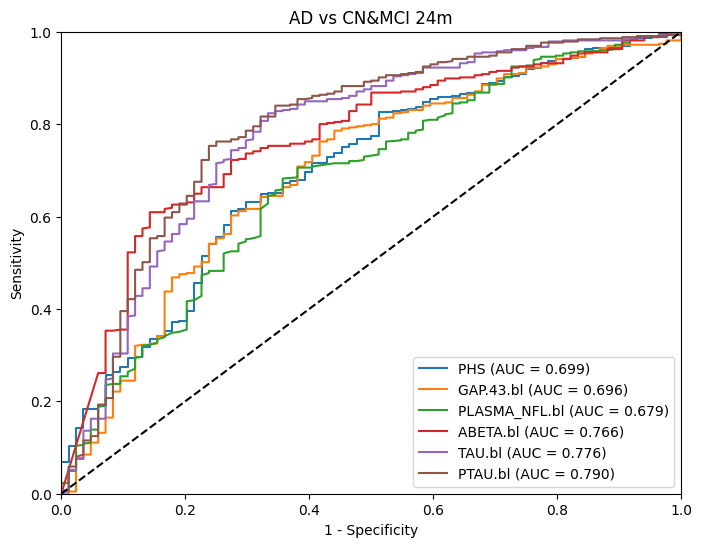

In [14]:
## AD vs CN&MCI ROC test with m24 data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import numpy as np

df_A_CM = df[['AGE', 'PTEDUCAT', 'MMSE', 'ABETA.bl', 'TAU.bl', 'PTAU.bl', 'PHS', 'GAP.43.bl', 'PLASMA_NFL.bl', 'PTGENDER', 'APOE4', 'DX']].copy()
df_A_CM['DX'] = df_A_CM['DX'].replace(['MCI', 'CN'], 'CN&MCI')
unique_values = df_A_CM['DX'].unique()
print(unique_values)

df_A_CM_filtered = df_A_CM[df_A_CM['DX'].isin(['AD', 'CN&MCI'])]

results = []

variables = ['PHS', 'GAP.43.bl', 'PLASMA_NFL.bl', 'ABETA.bl', 'TAU.bl', 'PTAU.bl']

for variable in variables:
    cn_values = df_A_CM_filtered[df_A_CM_filtered['DX'] == 'AD'][variable]
    ad_values = df_A_CM_filtered[df_A_CM_filtered['DX'] == 'CN&MCI'][variable]

    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_A_CM_filtered['DX'], df_A_CM_filtered[variable], pos_label='CN&MCI')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_A_CM_filtered['DX'], -df_A_CM_filtered[variable], pos_label='CN&MCI')
    
    auc = metrics.auc(fpr, tpr)

    # Perform bootstrapping
    np.random.seed(0)
    n_iterations = 1000
    auc_bootstrapped = []
    for _ in range(n_iterations):
        cn_samples = np.random.choice(cn_values, size=len(cn_values), replace=True)
        ad_samples = np.random.choice(ad_values, size=len(ad_values), replace=True)
        if variable == 'ABETA.bl':
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['AD'] * len(cn_samples), ['CN&MCI'] * len(ad_samples))),
                np.concatenate((cn_samples, ad_samples)),
                pos_label='CN&MCI'
            )
        else:
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['AD'] * len(cn_samples), ['CN&MCI'] * len(ad_samples))),
                -np.concatenate((cn_samples, ad_samples)),
                pos_label='CN&MCI'
            )
        auc_bootstrapped.append(metrics.auc(fpr, tpr))
    
    auc_bootstrapped = np.array(auc_bootstrapped)
    ci_low, ci_high = np.percentile(auc_bootstrapped, [2.5, 97.5])
    
    _, p_value = stats.mannwhitneyu(cn_values, ad_values, alternative='two-sided')
    
    results.append([variable, auc, ci_low, ci_high, p_value])

results_df_A_CM = pd.DataFrame(results, columns=['Variable', 'AUC', 'CI Low', 'CI High', 'p-value'])
print(results_df_A_CM)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for variable in variables:
    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_A_CM_filtered['DX'], df_A_CM_filtered[variable], pos_label='CN&MCI')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_A_CM_filtered['DX'], -df_A_CM_filtered[variable], pos_label='CN&MCI')
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{variable} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('AD vs CN&MCI 24m')
plt.legend()
plt.grid(False)
plt.savefig('ROC_AD_CN&MCI_m24.pdf', format='pdf')
plt.show()

# Save the table 
results_df_A_CM.to_csv('/content/ROC_AD_CN&MCI_m24.tsv', sep='\t', index=False)


In [17]:
# Donload tables and plots on local machine
from google.colab import files

files.download('/content/ROC_MCI_AD_m24.tsv')
files.download('/content/ROC_MCI_AD_m24.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
files.download('/content/ROC_AD_CN&MCI_m24.tsv')
files.download('/content/ROC_AD_CN&MCI_m24.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
files.download('/content/ROC_CN_AD&MCI_m24.tsv')
files.download('/content/ROC_CN_AD&MCI_m24.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
files.download('/content/ROC_CN_AD_m24.tsv')
files.download('/content/ROC_CN_AD_m24.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
files.download('/content/ROC_CN_MCI_m24.tsv')
files.download('/content/ROC_CN_MCI_m24.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# Import df_m48 data, generated in R, from my drive
df = pd.read_csv("drive/MyDrive/df_m48.csv")

        Variable       AUC    CI Low   CI High       p-value
0            PHS  0.803457  0.724336  0.875650  1.396727e-09
1      GAP.43.bl  0.626336  0.524577  0.729348  1.173012e-02
2  PLASMA_NFL.bl  0.658500  0.560215  0.745369  1.565442e-03
3       ABETA.bl  0.798378  0.719169  0.870456  1.736166e-09
4         TAU.bl  0.753029  0.652873  0.842347  4.436226e-07
5        PTAU.bl  0.767373  0.664808  0.860175  9.524858e-08


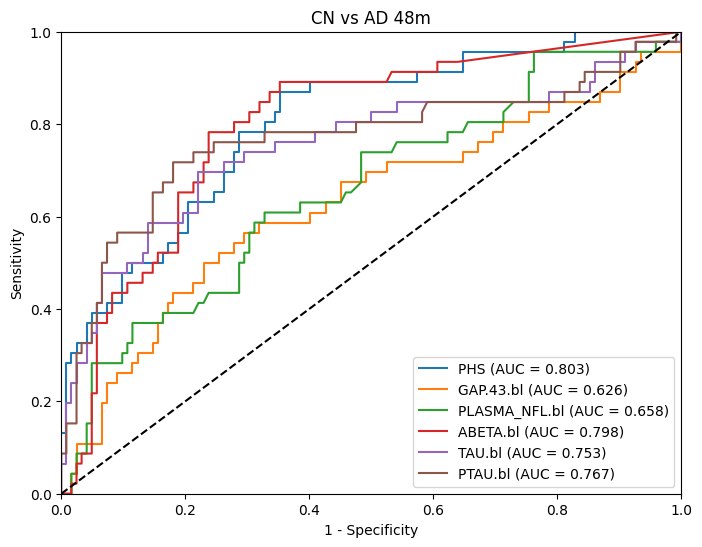

In [25]:
## CN vs AD ROC test with m48 data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import numpy as np

df_filtered = df[df['DX'].isin(['CN', 'AD'])]

results = []

variables = ['PHS', 'GAP.43.bl', 'PLASMA_NFL.bl', 'ABETA.bl', 'TAU.bl', 'PTAU.bl']

for variable in variables:
    cn_values = df_filtered[df_filtered['DX'] == 'CN'][variable]
    ad_values = df_filtered[df_filtered['DX'] == 'AD'][variable]

    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], -df_filtered[variable], pos_label='AD')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], df_filtered[variable], pos_label='AD')
    
    auc = metrics.auc(fpr, tpr)

    # Perform bootstrapping
    np.random.seed(0)
    n_iterations = 1000
    auc_bootstrapped = []
    for _ in range(n_iterations):
        cn_samples = np.random.choice(cn_values, size=len(cn_values), replace=True)
        ad_samples = np.random.choice(ad_values, size=len(ad_values), replace=True)
        if variable == 'ABETA.bl':
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['CN'] * len(cn_samples), ['AD'] * len(ad_samples))),
                -np.concatenate((cn_samples, ad_samples)),
                pos_label='AD'
            )
        else:
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['CN'] * len(cn_samples), ['AD'] * len(ad_samples))),
                np.concatenate((cn_samples, ad_samples)),
                pos_label='AD'
            )
        auc_bootstrapped.append(metrics.auc(fpr, tpr))
    
    auc_bootstrapped = np.array(auc_bootstrapped)
    ci_low, ci_high = np.percentile(auc_bootstrapped, [2.5, 97.5])
    
    _, p_value = stats.mannwhitneyu(cn_values, ad_values, alternative='two-sided')
    
    results.append([variable, auc, ci_low, ci_high, p_value])

results_df = pd.DataFrame(results, columns=['Variable', 'AUC', 'CI Low', 'CI High', 'p-value'])
print(results_df)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for variable in variables:
    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], -df_filtered[variable], pos_label='AD')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], df_filtered[variable], pos_label='AD')
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{variable} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('CN vs AD 48m')
plt.legend()
plt.grid(False)
plt.savefig('ROC_CN_AD_m48.pdf', format='pdf')
plt.show()

# Save the table 
results_df.to_csv('/content/ROC_CN_AD_m48.tsv', sep='\t', index=False)


        Variable       AUC    CI Low   CI High   p-value
0            PHS  0.583382  0.518751  0.651753  0.020179
1      GAP.43.bl  0.494368  0.423736  0.563704  0.875933
2  PLASMA_NFL.bl  0.524443  0.454491  0.591979  0.496255
3       ABETA.bl  0.593230  0.521579  0.657240  0.008397
4         TAU.bl  0.529131  0.459173  0.597903  0.417345
5        PTAU.bl  0.544492  0.473934  0.612633  0.215289


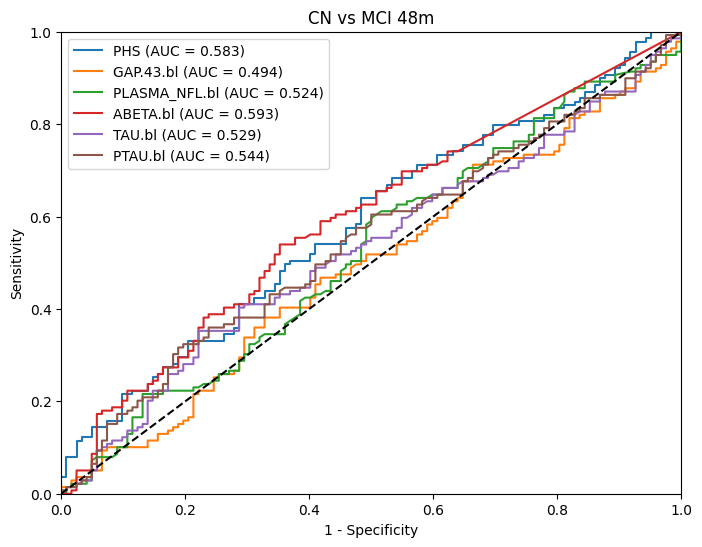

In [26]:
## CN vs MCI ROC test with m48 data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import numpy as np

df_filtered = df[df['DX'].isin(['CN', 'MCI'])]

results = []

variables = ['PHS', 'GAP.43.bl', 'PLASMA_NFL.bl', 'ABETA.bl', 'TAU.bl', 'PTAU.bl']

for variable in variables:
    cn_values = df_filtered[df_filtered['DX'] == 'CN'][variable]
    ad_values = df_filtered[df_filtered['DX'] == 'MCI'][variable]

    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], -df_filtered[variable], pos_label='MCI')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], df_filtered[variable], pos_label='MCI')
    
    auc = metrics.auc(fpr, tpr)

    # Perform bootstrapping
    np.random.seed(0)
    n_iterations = 1000
    auc_bootstrapped = []
    for _ in range(n_iterations):
        cn_samples = np.random.choice(cn_values, size=len(cn_values), replace=True)
        ad_samples = np.random.choice(ad_values, size=len(ad_values), replace=True)
        if variable == 'ABETA.bl':
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['CN'] * len(cn_samples), ['MCI'] * len(ad_samples))),
                -np.concatenate((cn_samples, ad_samples)),
                pos_label='MCI'
            )
        else:
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['CN'] * len(cn_samples), ['MCI'] * len(ad_samples))),
                np.concatenate((cn_samples, ad_samples)),
                pos_label='MCI'
            )
        auc_bootstrapped.append(metrics.auc(fpr, tpr))
    
    auc_bootstrapped = np.array(auc_bootstrapped)
    ci_low, ci_high = np.percentile(auc_bootstrapped, [2.5, 97.5])
    
    _, p_value = stats.mannwhitneyu(cn_values, ad_values, alternative='two-sided')
    
    results.append([variable, auc, ci_low, ci_high, p_value])

results_df = pd.DataFrame(results, columns=['Variable', 'AUC', 'CI Low', 'CI High', 'p-value'])
print(results_df)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for variable in variables:
    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], -df_filtered[variable], pos_label='MCI')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], df_filtered[variable], pos_label='MCI')
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{variable} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('CN vs MCI 48m')
plt.legend()
plt.grid(False)
plt.savefig('ROC_CN_MCI_m48.pdf', format='pdf')
plt.show()

# Save the table 
results_df.to_csv('/content/ROC_CN_MCI_m48.tsv', sep='\t', index=False)


        Variable       AUC    CI Low   CI High   p-value
0            PHS  0.729590  0.650282  0.809673  0.000003
1      GAP.43.bl  0.631764  0.534247  0.729958  0.007482
2  PLASMA_NFL.bl  0.646778  0.551048  0.737819  0.002886
3       ABETA.bl  0.714576  0.629324  0.791691  0.000012
4         TAU.bl  0.728183  0.629962  0.820304  0.000004
5        PTAU.bl  0.739912  0.642919  0.829688  0.000001


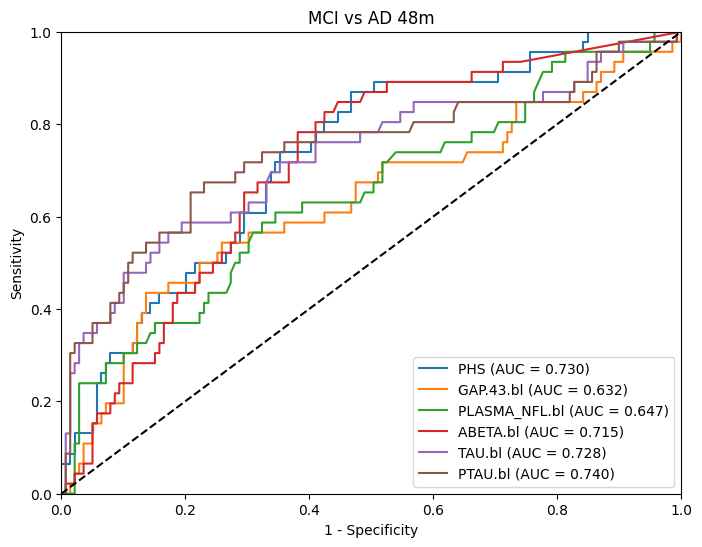

In [27]:
## MCI vs AD ROC test with m48 data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import numpy as np

df_filtered = df[df['DX'].isin(['MCI', 'AD'])]

results = []

variables = ['PHS', 'GAP.43.bl', 'PLASMA_NFL.bl', 'ABETA.bl', 'TAU.bl', 'PTAU.bl']

for variable in variables:
    cn_values = df_filtered[df_filtered['DX'] == 'MCI'][variable]
    ad_values = df_filtered[df_filtered['DX'] == 'AD'][variable]

    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], -df_filtered[variable], pos_label='AD')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], df_filtered[variable], pos_label='AD')
    
    auc = metrics.auc(fpr, tpr)

    # Perform bootstrapping
    np.random.seed(0)
    n_iterations = 1000
    auc_bootstrapped = []
    for _ in range(n_iterations):
        cn_samples = np.random.choice(cn_values, size=len(cn_values), replace=True)
        ad_samples = np.random.choice(ad_values, size=len(ad_values), replace=True)
        if variable == 'ABETA.bl':
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['MCI'] * len(cn_samples), ['AD'] * len(ad_samples))),
                -np.concatenate((cn_samples, ad_samples)),
                pos_label='AD'
            )
        else:
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['MCI'] * len(cn_samples), ['AD'] * len(ad_samples))),
                np.concatenate((cn_samples, ad_samples)),
                pos_label='AD'
            )
        auc_bootstrapped.append(metrics.auc(fpr, tpr))
    
    auc_bootstrapped = np.array(auc_bootstrapped)
    ci_low, ci_high = np.percentile(auc_bootstrapped, [2.5, 97.5])
    
    _, p_value = stats.mannwhitneyu(cn_values, ad_values, alternative='two-sided')
    
    results.append([variable, auc, ci_low, ci_high, p_value])

results_df = pd.DataFrame(results, columns=['Variable', 'AUC', 'CI Low', 'CI High', 'p-value'])
print(results_df)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for variable in variables:
    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], -df_filtered[variable], pos_label='AD')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_filtered['DX'], df_filtered[variable], pos_label='AD')
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{variable} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('MCI vs AD 48m')
plt.legend()
plt.grid(False)
plt.savefig('ROC_MCI_AD_m48.pdf', format='pdf')
plt.show()

# Save the table 
results_df.to_csv('/content/ROC_MCI_AD_m48.tsv', sep='\t', index=False)


['AD&MCI' nan 'CN']
        Variable       AUC    CI Low   CI High   p-value
0            PHS  0.638104  0.575539  0.698193  0.000042
1      GAP.43.bl  0.527182  0.458079  0.593817  0.420591
2  PLASMA_NFL.bl  0.557776  0.490690  0.620060  0.086779
3       ABETA.bl  0.644240  0.581124  0.706106  0.000016
4         TAU.bl  0.584803  0.520841  0.650732  0.011934
5        PTAU.bl  0.599911  0.539254  0.666454  0.003055


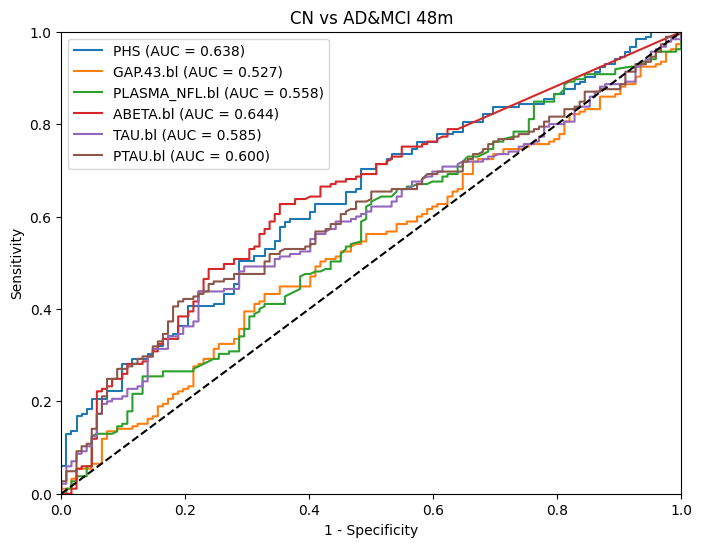

In [28]:
## CN vs AD&MCI ROC test with m48 data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import numpy as np

df_C_AM = df[['AGE', 'PTEDUCAT', 'MMSE', 'ABETA.bl', 'TAU.bl', 'PTAU.bl', 'PHS', 'GAP.43.bl', 'PLASMA_NFL.bl', 'PTGENDER', 'APOE4', 'DX']].copy()
df_C_AM['DX'] = df_C_AM['DX'].replace(['MCI', 'AD'], 'AD&MCI')
unique_values = df_C_AM['DX'].unique()
print(unique_values)

df_C_AM_filtered = df_C_AM[df_C_AM['DX'].isin(['CN', 'AD&MCI'])]

results = []

variables = ['PHS', 'GAP.43.bl', 'PLASMA_NFL.bl', 'ABETA.bl', 'TAU.bl', 'PTAU.bl']

for variable in variables:
    cn_values = df_C_AM_filtered[df_C_AM_filtered['DX'] == 'CN'][variable]
    ad_values = df_C_AM_filtered[df_C_AM_filtered['DX'] == 'AD&MCI'][variable]

    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_C_AM_filtered['DX'], -df_C_AM_filtered[variable], pos_label='AD&MCI')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_C_AM_filtered['DX'], df_C_AM_filtered[variable], pos_label='AD&MCI')
    
    auc = metrics.auc(fpr, tpr)

    # Perform bootstrapping
    np.random.seed(0)
    n_iterations = 1000
    auc_bootstrapped = []
    for _ in range(n_iterations):
        cn_samples = np.random.choice(cn_values, size=len(cn_values), replace=True)
        ad_samples = np.random.choice(ad_values, size=len(ad_values), replace=True)
        if variable == 'ABETA.bl':
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['CN'] * len(cn_samples), ['AD&MCI'] * len(ad_samples))),
                -np.concatenate((cn_samples, ad_samples)),
                pos_label='AD&MCI'
            )
        else:
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['CN'] * len(cn_samples), ['AD&MCI'] * len(ad_samples))),
                np.concatenate((cn_samples, ad_samples)),
                pos_label='AD&MCI'
            )
        auc_bootstrapped.append(metrics.auc(fpr, tpr))
    
    auc_bootstrapped = np.array(auc_bootstrapped)
    ci_low, ci_high = np.percentile(auc_bootstrapped, [2.5, 97.5])
    
    _, p_value = stats.mannwhitneyu(cn_values, ad_values, alternative='two-sided')
    
    results.append([variable, auc, ci_low, ci_high, p_value])

results_df_C_AM = pd.DataFrame(results, columns=['Variable', 'AUC', 'CI Low', 'CI High', 'p-value'])
print(results_df_C_AM)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for variable in variables:
    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_C_AM_filtered['DX'], -df_C_AM_filtered[variable], pos_label='AD&MCI')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_C_AM_filtered['DX'], df_C_AM_filtered[variable], pos_label='AD&MCI')
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{variable} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('CN vs AD&MCI 48m')
plt.legend()
plt.grid(False)
plt.savefig('ROC_CN_AD&MCI_m48.pdf', format='pdf')
plt.show()

# Save the table 
results_df_C_AM.to_csv('/content/ROC_CN_AD&MCI_m48.tsv', sep='\t', index=False)


['CN&MCI' nan 'AD']
        Variable       AUC    CI Low   CI High       p-value
0            PHS  0.764118  0.684820  0.827363  1.120395e-08
1      GAP.43.bl  0.629227  0.530189  0.720646  5.205879e-03
2  PLASMA_NFL.bl  0.652257  0.559132  0.740723  9.942580e-04
3       ABETA.bl  0.753748  0.680609  0.819931  2.987461e-08
4         TAU.bl  0.739797  0.638964  0.824647  2.155434e-07
5        PTAU.bl  0.752749  0.654411  0.840528  4.615236e-08


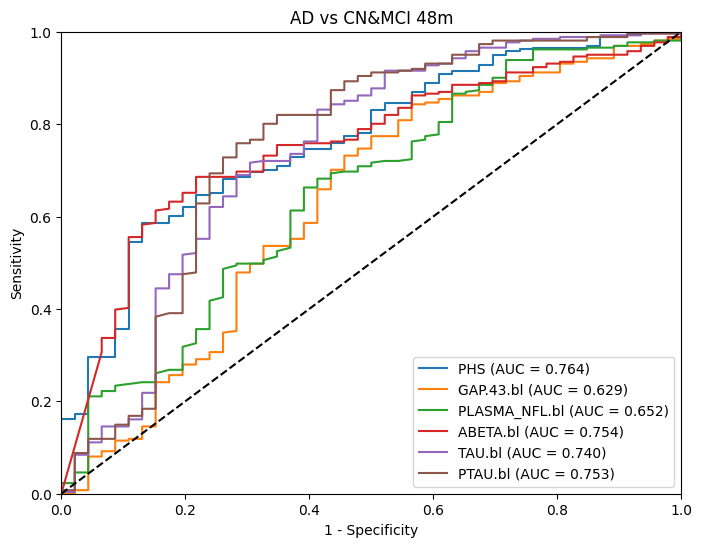

In [29]:
## AD vs CN&MCI ROC test with m48 data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import numpy as np

df_A_CM = df[['AGE', 'PTEDUCAT', 'MMSE', 'ABETA.bl', 'TAU.bl', 'PTAU.bl', 'PHS', 'GAP.43.bl', 'PLASMA_NFL.bl', 'PTGENDER', 'APOE4', 'DX']].copy()
df_A_CM['DX'] = df_A_CM['DX'].replace(['MCI', 'CN'], 'CN&MCI')
unique_values = df_A_CM['DX'].unique()
print(unique_values)

df_A_CM_filtered = df_A_CM[df_A_CM['DX'].isin(['AD', 'CN&MCI'])]

results = []

variables = ['PHS', 'GAP.43.bl', 'PLASMA_NFL.bl', 'ABETA.bl', 'TAU.bl', 'PTAU.bl']

for variable in variables:
    cn_values = df_A_CM_filtered[df_A_CM_filtered['DX'] == 'AD'][variable]
    ad_values = df_A_CM_filtered[df_A_CM_filtered['DX'] == 'CN&MCI'][variable]

    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_A_CM_filtered['DX'], df_A_CM_filtered[variable], pos_label='CN&MCI')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_A_CM_filtered['DX'], -df_A_CM_filtered[variable], pos_label='CN&MCI')
    
    auc = metrics.auc(fpr, tpr)

    # Perform bootstrapping
    np.random.seed(0)
    n_iterations = 1000
    auc_bootstrapped = []
    for _ in range(n_iterations):
        cn_samples = np.random.choice(cn_values, size=len(cn_values), replace=True)
        ad_samples = np.random.choice(ad_values, size=len(ad_values), replace=True)
        if variable == 'ABETA.bl':
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['AD'] * len(cn_samples), ['CN&MCI'] * len(ad_samples))),
                np.concatenate((cn_samples, ad_samples)),
                pos_label='CN&MCI'
            )
        else:
            fpr, tpr, _ = metrics.roc_curve(
                np.concatenate((['AD'] * len(cn_samples), ['CN&MCI'] * len(ad_samples))),
                -np.concatenate((cn_samples, ad_samples)),
                pos_label='CN&MCI'
            )
        auc_bootstrapped.append(metrics.auc(fpr, tpr))
    
    auc_bootstrapped = np.array(auc_bootstrapped)
    ci_low, ci_high = np.percentile(auc_bootstrapped, [2.5, 97.5])
    
    _, p_value = stats.mannwhitneyu(cn_values, ad_values, alternative='two-sided')
    
    results.append([variable, auc, ci_low, ci_high, p_value])

results_df_A_CM = pd.DataFrame(results, columns=['Variable', 'AUC', 'CI Low', 'CI High', 'p-value'])
print(results_df_A_CM)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for variable in variables:
    if variable == 'ABETA.bl':
        fpr, tpr, thresholds = metrics.roc_curve(df_A_CM_filtered['DX'], df_A_CM_filtered[variable], pos_label='CN&MCI')
    else:
        fpr, tpr, thresholds = metrics.roc_curve(df_A_CM_filtered['DX'], -df_A_CM_filtered[variable], pos_label='CN&MCI')
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{variable} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('AD vs CN&MCI 48m')
plt.legend()
plt.grid(False)
plt.savefig('ROC_AD_CN&MCI_m48.pdf', format='pdf')
plt.show()

# Save the table 
results_df_A_CM.to_csv('/content/ROC_AD_CN&MCI_m48.tsv', sep='\t', index=False)


In [30]:
# Donload tables and plots on local machine
files.download('/content/ROC_MCI_AD_m48.tsv')
files.download('/content/ROC_MCI_AD_m48.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
files.download('/content/ROC_AD_CN&MCI_m48.tsv')
files.download('/content/ROC_AD_CN&MCI_m48.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
files.download('/content/ROC_CN_AD&MCI_m48.tsv')
files.download('/content/ROC_CN_AD&MCI_m48.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
files.download('/content/ROC_CN_AD_m48.tsv')
files.download('/content/ROC_CN_AD_m48.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
files.download('/content/ROC_CN_MCI_m48.tsv')
files.download('/content/ROC_CN_MCI_m48.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>